In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import datetime as dt

In [2]:
#importing the datasets 
covid_df=pd.read_csv('covid.csv')

In [3]:
covid_df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
covid_df.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19491,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19495,NaN,International,2020-03-10,696,-9,7,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
covid_df.shape

(19496, 32)

In [6]:
covid_df['location'].value_counts()

Australia         146
World             146
Singapore         146
Austria           146
Germany           146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: location, Length: 212, dtype: int64

In [7]:
#checking for NAN values
covid_df.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [8]:
covid_df.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [9]:
covid_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19491    False
19492    False
19493    False
19494    False
19495    False
Length: 19496, dtype: bool

In [10]:
covid_df=covid_df.drop_duplicates()

In [11]:
duplicate_rows_df=covid_df[covid_df.duplicated()]
print("number of duplicate rows : ",duplicate_rows_df.shape)

number of duplicate rows :  (0, 32)


In [12]:
to_drop = []

In [13]:
covid_df.isna()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
19492,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
19493,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
19494,True,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [14]:
covid_df.round(2)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.73,18.73,0.0,...,13.08,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.47,18.73,0.0,...,13.08,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.40,74.93,0.0,...,13.08,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.23,46.83,0.0,...,13.08,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.96,18.73,0.0,...,13.08,7.45,35973.78,NaN,NaN,11.62,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19491,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#taking data of covid in India
india_cases=covid_df[covid_df["location"]=="India"]

In [16]:
india_cases.shape

(145, 32)

In [17]:
india_cases.dropna(axis=1)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.000,0.000,0.000,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,IND,India,2020-05-20,106750,5611,3303,140,77.355,4.066,2.393,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,2020-05-21,112359,5609,3435,132,81.419,4.064,2.489,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [18]:
india_cases.isna()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8522,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
india_cases.isna().sum()

iso_code                            0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
total_tests                        85
new_tests                          91
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_units                        73
stringency_index                    1
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_poverty                     0
cvd_death_ra

In [20]:
india_cases.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


In [21]:
india_cases.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8519,IND,India,2020-05-20,106750,5611,3303,140,77.355,4.066,2.393,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8520,IND,India,2020-05-21,112359,5609,3435,132,81.419,4.064,2.489,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8521,IND,India,2020-05-22,118447,6088,3583,148,85.831,4.412,2.596,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8522,IND,India,2020-05-23,125101,6654,3720,137,90.653,4.822,2.696,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8523,IND,India,2020-05-24,131868,6767,3867,147,95.556,4.904,2.802,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


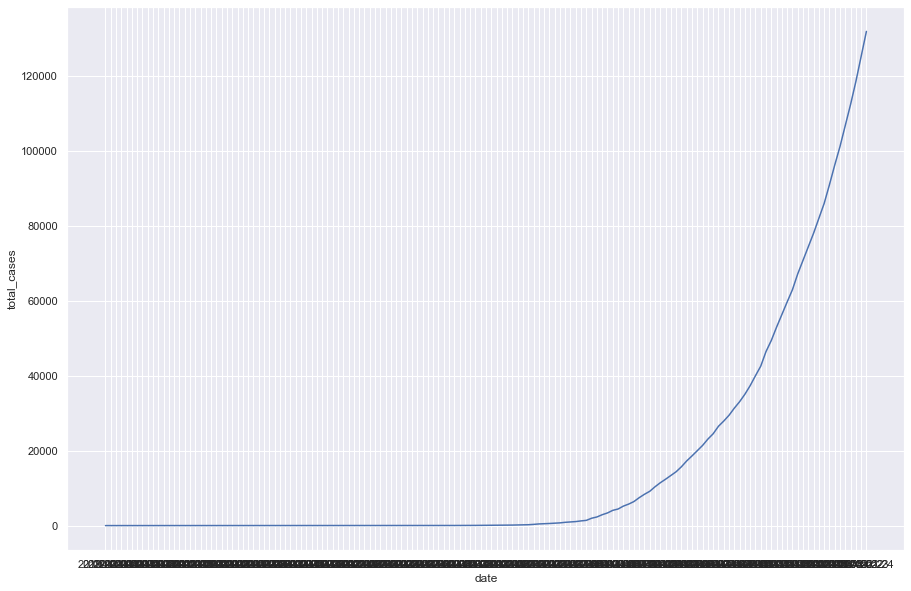

In [22]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_cases)
plt.show()

In [23]:
#dataframe for last 5 days 
india_last_5_days=india_cases.tail()

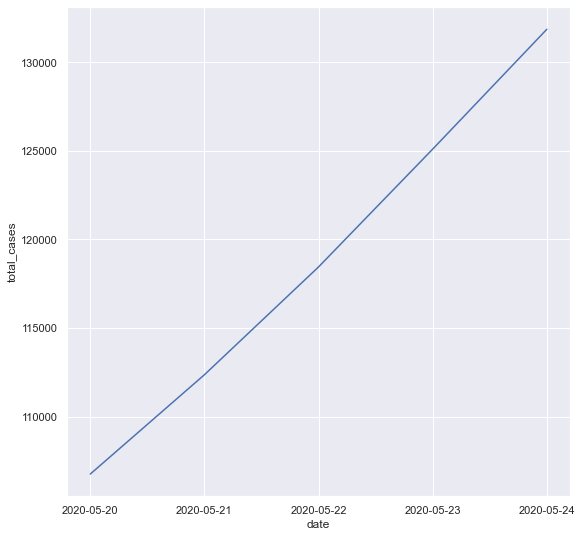

In [24]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(9,9)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

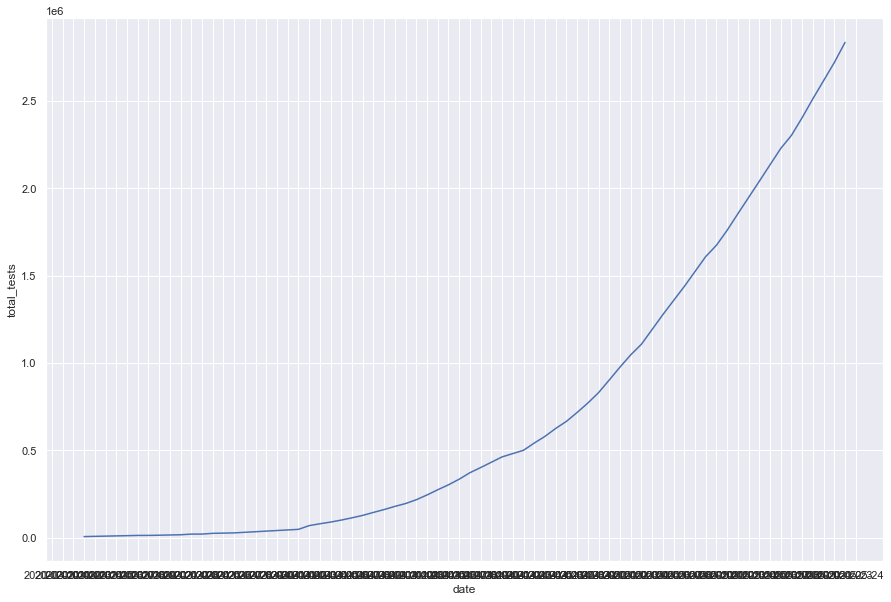

In [25]:
#Total tests per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_cases)
plt.show()

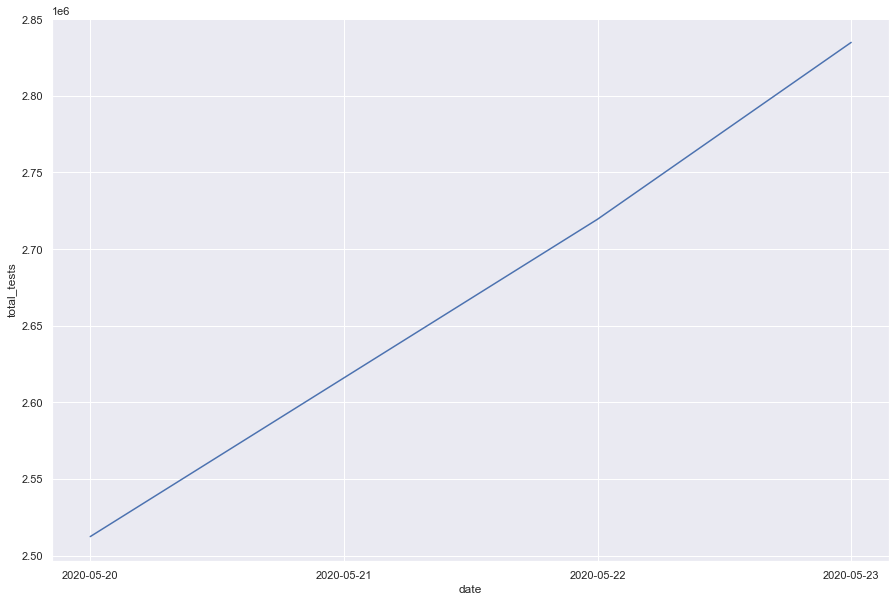

In [26]:
#Total tests in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

In [27]:
#Brazil Case
brazil_case=covid_df[covid_df["location"]=="Brazil"] 
brazil_case.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2510,BRA,Brazil,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2511,BRA,Brazil,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2512,BRA,Brazil,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2513,BRA,Brazil,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2514,BRA,Brazil,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [28]:
brazil_case.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
2651,BRA,Brazil,2020-05-20,271628,17408,17971,1179,1277.892,81.897,84.546,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2652,BRA,Brazil,2020-05-21,291579,19951,18859,888,1371.753,93.861,88.723,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2653,BRA,Brazil,2020-05-22,310087,18508,20047,1188,1458.825,87.072,94.312,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2654,BRA,Brazil,2020-05-23,330890,20803,21048,1001,1556.694,97.869,99.022,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [29]:
#Making a dataframe for brazil for last 5 days
brazil_last_5_days=brazil_case.tail()

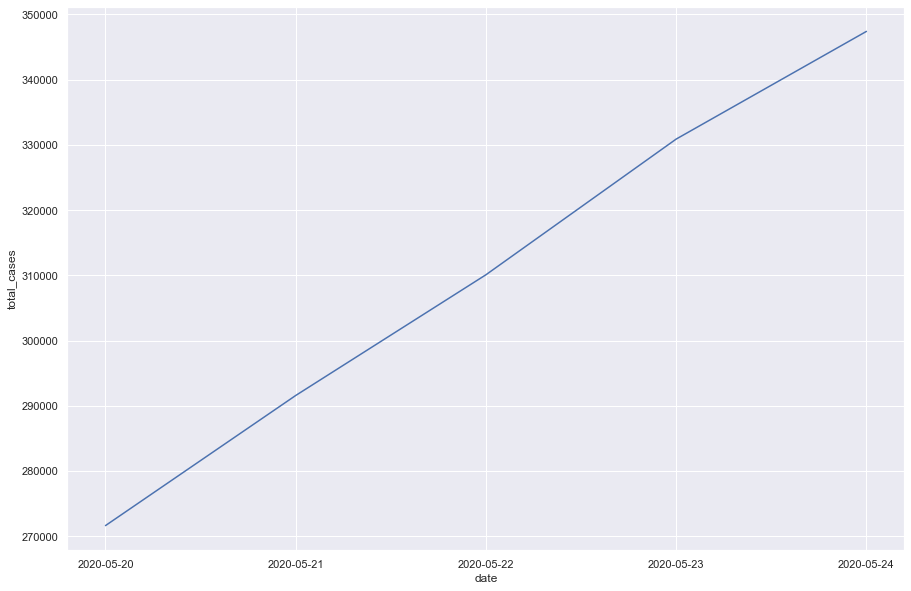

In [30]:
#Total cases in last 5 days
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [31]:
#Understanding cases of India, China and Japan
india_japan_china=covid_df[(covid_df["location"] =="India") | (covid_df["location"] =="China") | (covid_df["location"]=="Japan")]

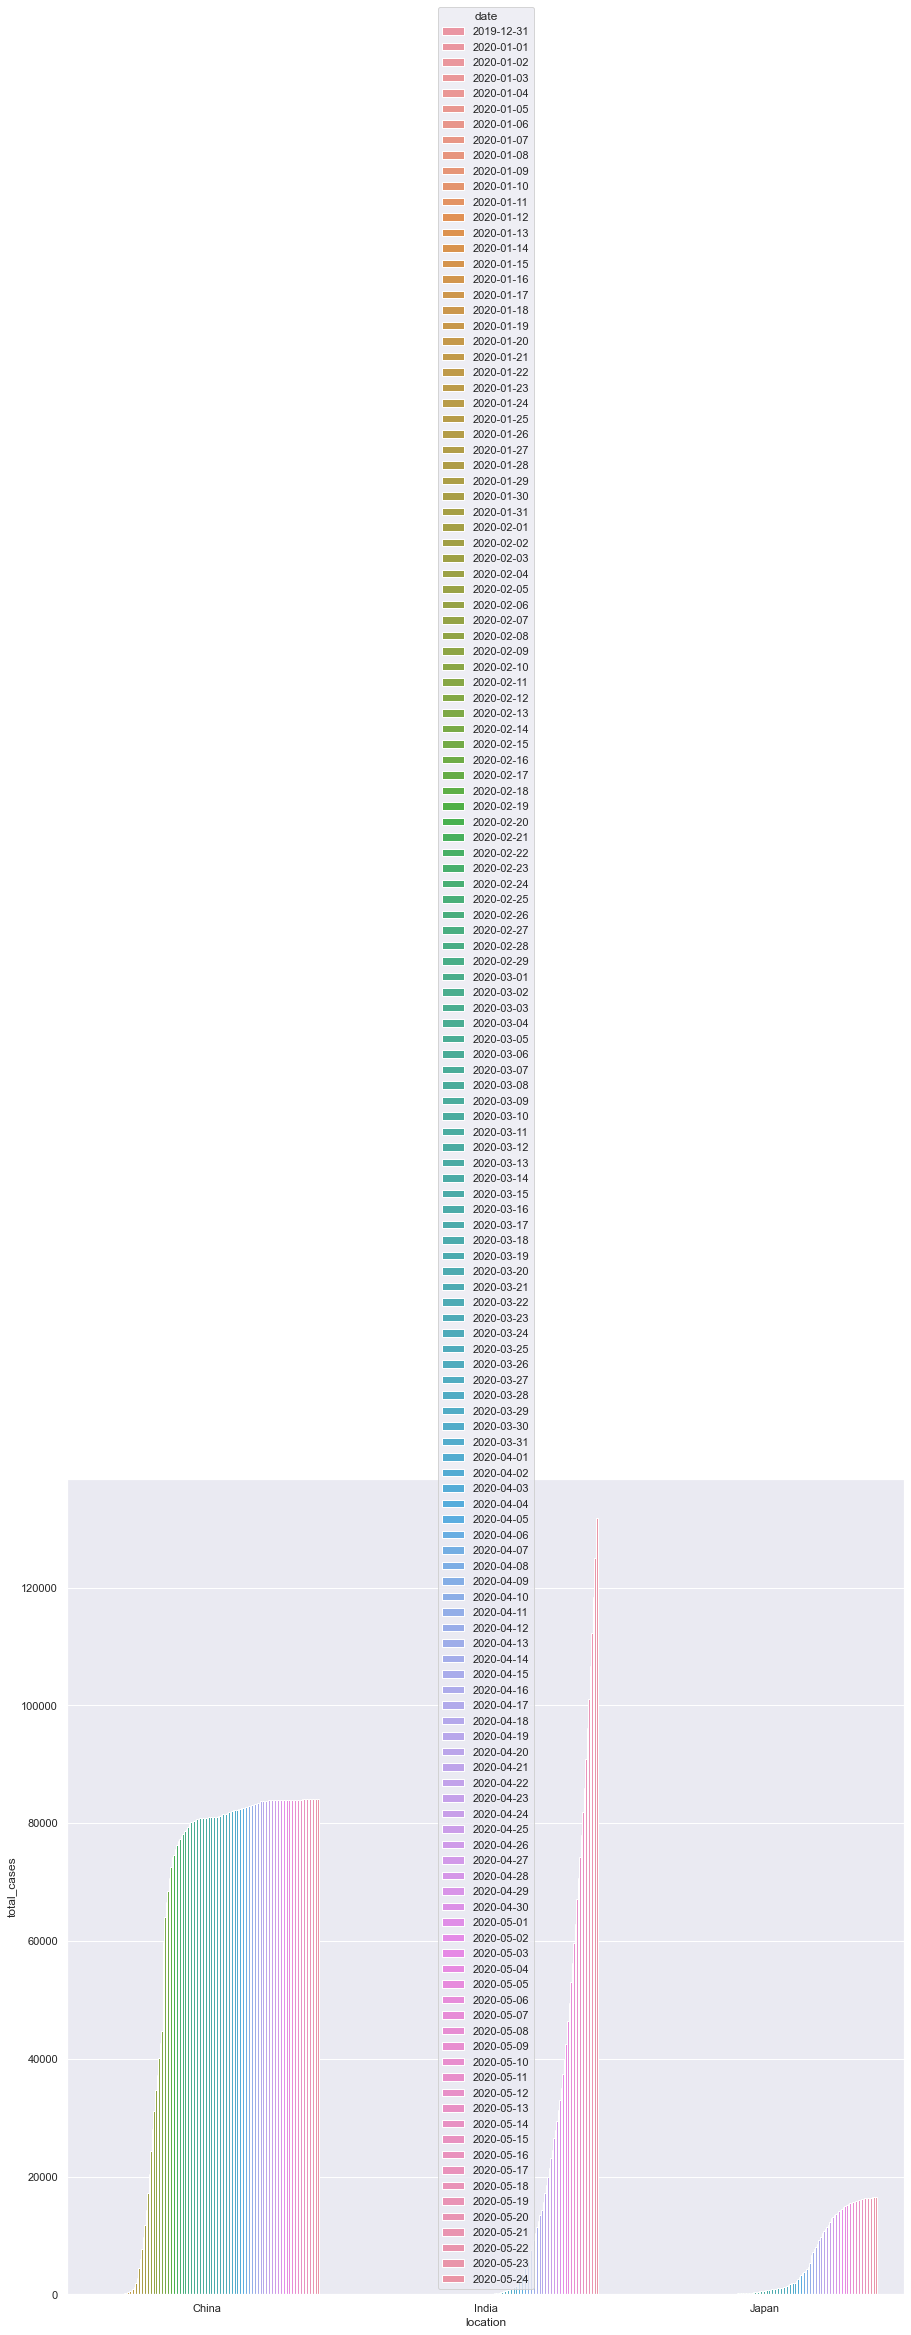

In [32]:
#Plotting growth of cases across China, India and Japan
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [33]:
#Getting latest data
last_day_cases=covid_df[covid_df["date"]=="2020-05-24"]
last_day_cases

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
62,ABW,Aruba,2020-05-24,101,0,3,0,945.994,0.000,28.099,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
198,AFG,Afghanistan,2020-05-24,9998,782,216,11,256.831,20.088,5.549,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
262,AGO,Angola,2020-05-24,60,0,3,0,1.826,0.000,0.091,...,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,ALB,Albania,2020-05-24,989,8,31,0,343.665,2.780,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19045,YEM,Yemen,2020-05-24,212,7,39,6,7.108,0.235,1.308,...,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
19153,ZAF,South Africa,2020-05-24,21343,1218,407,10,359.863,20.537,6.862,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320
19220,ZMB,Zambia,2020-05-24,920,0,7,0,50.044,0.000,0.381,...,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
19285,ZWE,Zimbabwe,2020-05-24,56,0,4,0,3.768,0.000,0.269,...,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700


In [34]:
#Sorting data w.r.t total_cases
max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19431,OWID_WRL,World,2020-05-24,5273572,97636,341722,3633,676.550,12.526,43.840,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,VGB,British Virgin Islands,2020-05-24,8,0,1,0,264.577,0.000,33.072,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
1645,BES,Bonaire Sint Eustatius and Saba,2020-05-24,6,0,0,0,228.824,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5543,ESH,Western Sahara,2020-05-24,6,0,0,0,10.045,0.000,0.000,...,NaN,1.380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,AIA,Anguilla,2020-05-24,3,0,0,0,199.973,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Top 5 countries with maximum cases
max_cases_country[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00


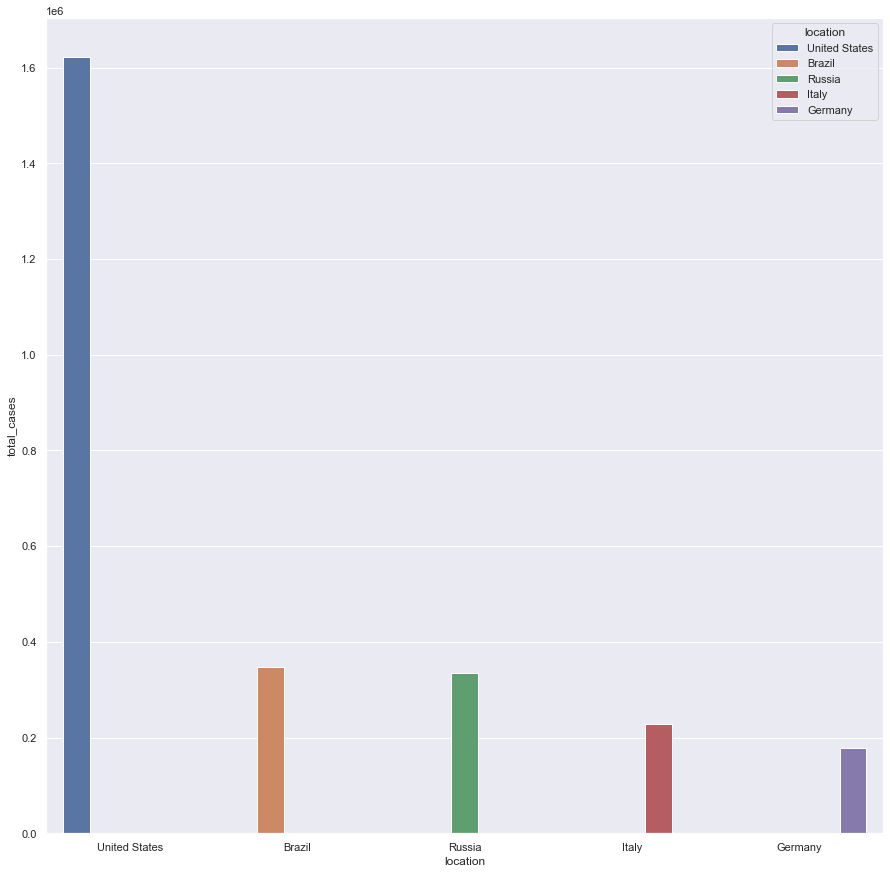

In [36]:
#Making bar-plot for countries with top cases
sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="location")
plt.show()

In [37]:
india_cases.head(40)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8379,IND,India,2019-12-31,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8380,IND,India,2020-01-01,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8381,IND,India,2020-01-02,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8382,IND,India,2020-01-03,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8383,IND,India,2020-01-04,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8384,IND,India,2020-01-05,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8385,IND,India,2020-01-06,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8386,IND,India,2020-01-07,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8387,IND,India,2020-01-08,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53
8388,IND,India,2020-01-09,0,0,0,0,0.000,0.000,0.0,...,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53


<function matplotlib.pyplot.show(close=None, block=None)>

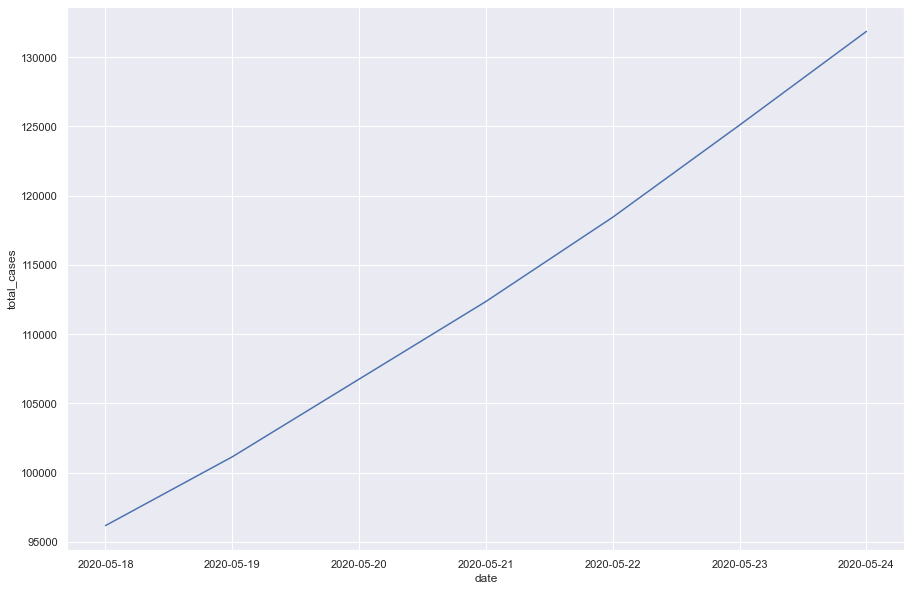

In [38]:
#total cases in last one week
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x='date',y='total_cases',data=india_cases.tail(7))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

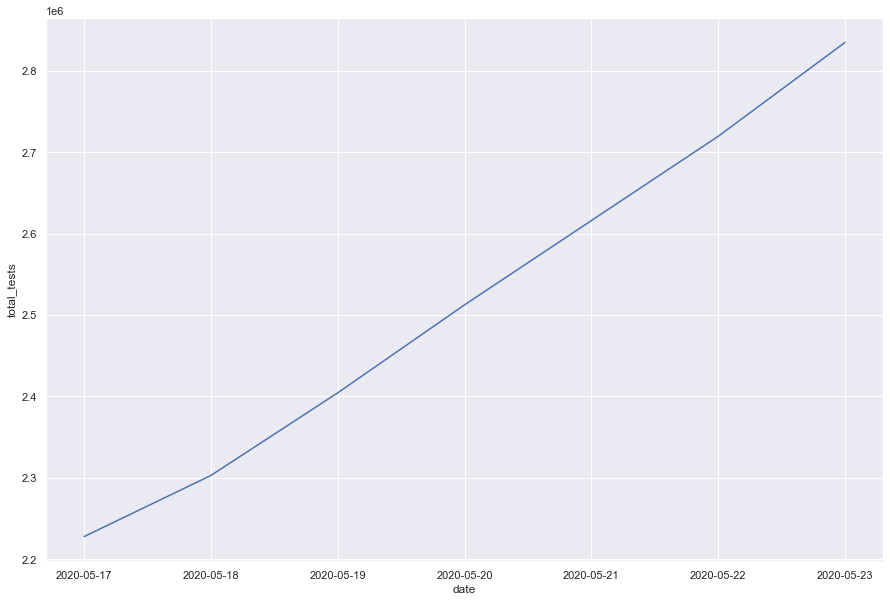

In [39]:
#test in last 7 days
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x='date',y='total_tests',data=india_cases.tail(8))
plt.show

## Simple Linear Regression

In [40]:
day=india_cases[india_cases['total_cases']>=0].groupby(['date'])[['total_cases']].sum()

In [41]:
x=np.arange(len(day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144])

In [42]:
y=day.values
y

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3

<function matplotlib.pyplot.show(close=None, block=None)>

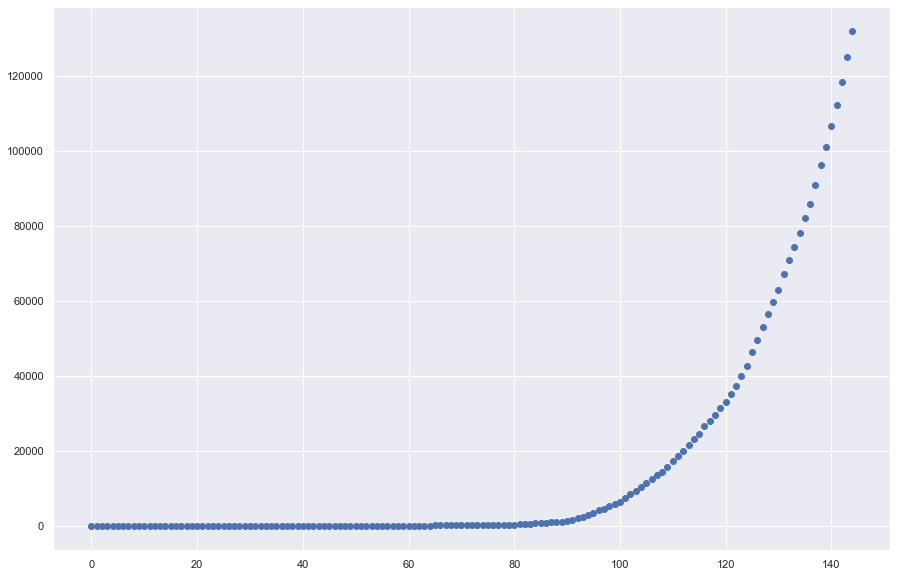

In [43]:
plt.scatter(x,y)
plt.show

In [44]:
x=x.reshape(-1,1)

In [45]:
y=y.reshape(-1,1)

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [48]:
ypred=model.predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

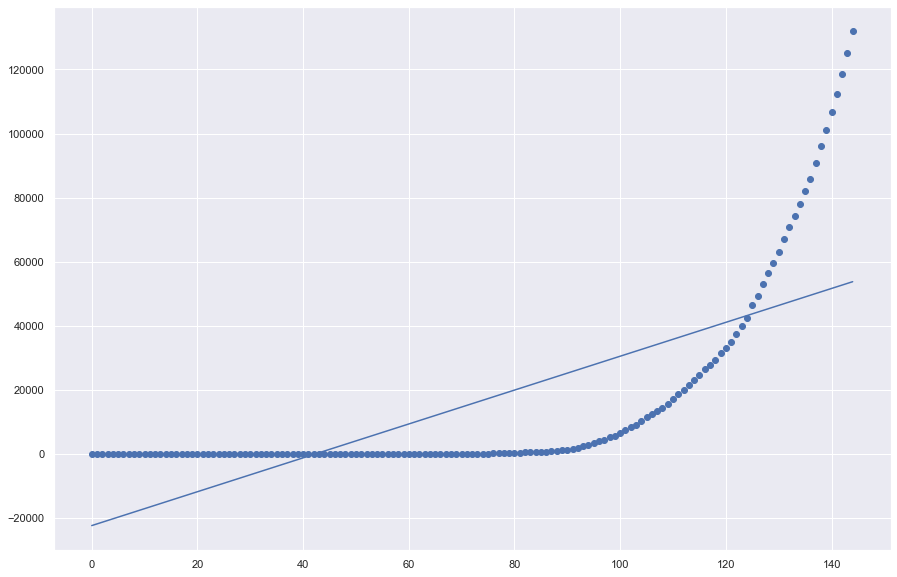

In [49]:
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show

In [50]:
model.score(x,y)*100

51.546604033071034

In [51]:
model.intercept_

array([-22386.77485132])

In [52]:
model.coef_

array([[528.68393436]])

## Polynomial Regression

In [53]:
polyFeat= PolynomialFeatures(degree=5)
X=polyFeat.fit_transform(x)
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.000000e+00
1,1.0,1.0,1.0,1.0,1.0,1.000000e+00
2,1.0,2.0,4.0,8.0,16.0,3.200000e+01
3,1.0,3.0,9.0,27.0,81.0,2.430000e+02
4,1.0,4.0,16.0,64.0,256.0,1.024000e+03
...,...,...,...,...,...,...
140,1.0,140.0,19600.0,2744000.0,384160000.0,5.378240e+10
141,1.0,141.0,19881.0,2803221.0,395254161.0,5.573084e+10
142,1.0,142.0,20164.0,2863288.0,406586896.0,5.773534e+10
143,1.0,143.0,20449.0,2924207.0,418161601.0,5.979711e+10


In [54]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
model1=LinearRegression()
model1.fit(Xtrain,ytrain)

LinearRegression()

In [56]:
ypred1=model1.predict(X)
ypred1

array([[-6.57113901e+00],
       [ 7.94770521e-01],
       [ 5.45747763e+00],
       [ 7.85529184e+00],
       [ 8.39191451e+00],
       [ 7.43755821e+00],
       [ 5.33006616e+00],
       [ 2.37603161e+00],
       [-1.14808276e+00],
       [-4.99482544e+00],
       [-8.94463666e+00],
       [-1.28047290e+01],
       [-1.64079680e+01],
       [-1.96117528e+01],
       [-2.22968966e+01],
       [-2.43665074e+01],
       [-2.57448685e+01],
       [-2.63763192e+01],
       [-2.62241353e+01],
       [-2.52694096e+01],
       [-2.35099329e+01],
       [-2.09590741e+01],
       [-1.76446612e+01],
       [-1.36078615e+01],
       [-8.90206258e+00],
       [-3.59175273e+00],
       [ 2.24859850e+00],
       [ 8.53565965e+00],
       [ 1.51783567e+01],
       [ 2.20789927e+01],
       [ 2.91343667e+01],
       [ 3.62368936e+01],
       [ 4.32757237e+01],
       [ 5.01378613e+01],
       [ 5.67092848e+01],
       [ 6.28760662e+01],
       [ 6.85254899e+01],
       [ 7.35471724e+01],
       [ 7.7

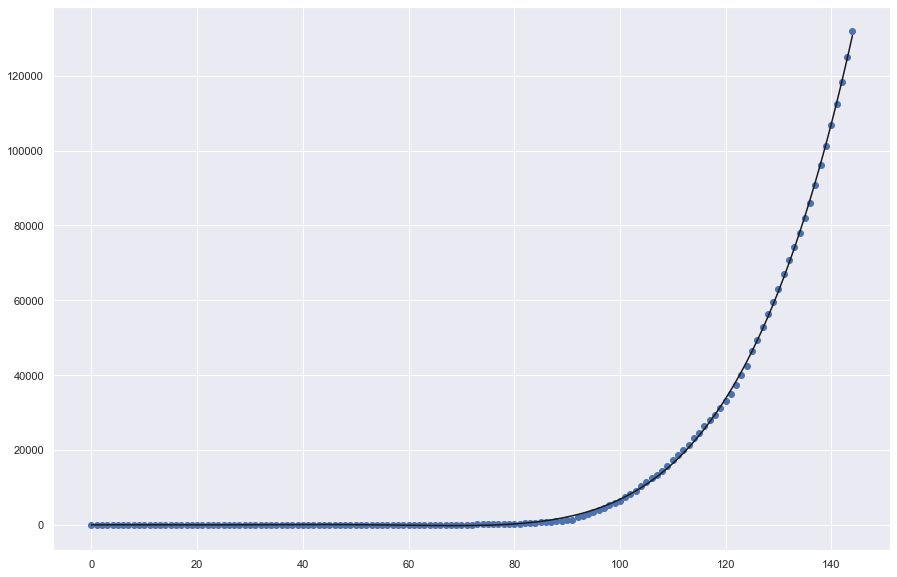

In [57]:
plt.scatter(x,y)
plt.plot(x,ypred1,color='k')
plt.show()

In [58]:
model1.score(X,y)*100

99.98007645181191

In [59]:
model1.predict(polyFeat.transform([[144]]))

array([[130742.26477585]])